In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
#importing modules

In [58]:
df=pd.read_csv('USA_Housing.csv')
#reading file

In [59]:
df.head()
#looking data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

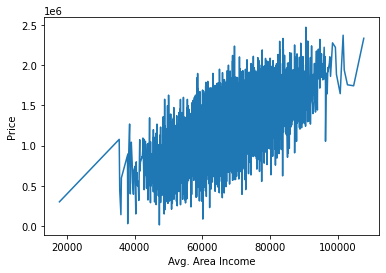

In [60]:
sns.lineplot(x='Avg. Area Income',y='Price',data=df)
#seeing the impact of area income on price....it is direactly proportional (mostly)...so important feature in determining

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Price'>

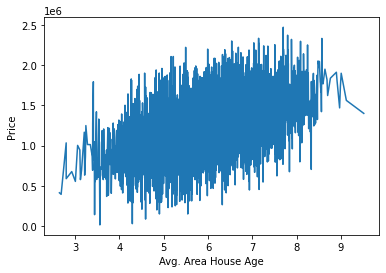

In [61]:
sns.lineplot(x='Avg. Area House Age',y='Price',data=df)
#seeing the impact of area income on price.... slightly less directly proportional, as compare to previous...also important, but income has more impact

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Price'>

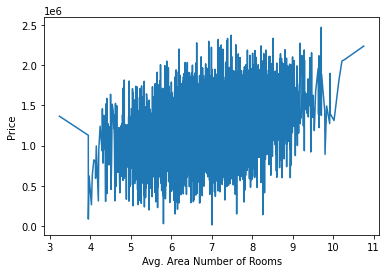

In [63]:
sns.lineplot(x='Avg. Area Number of Rooms',y='Price',data=df)
#same as house age..more or less

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

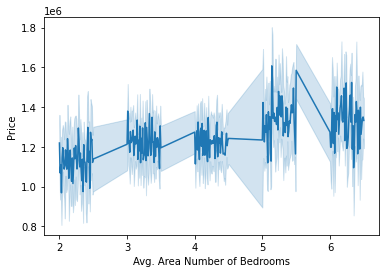

In [82]:
sns.lineplot(x='Avg. Area Number of Bedrooms',y='Price',data=df)
#2 and 3 bedrooms are more or less same...5 bedrooms are less in number but give high price

<AxesSubplot:xlabel='Area Population', ylabel='Price'>

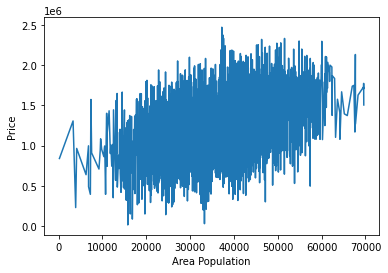

In [84]:
sns.lineplot(x='Area Population',y='Price',data=df)
#directly proportional..more or less same as house age

In [85]:
df=df.drop('Address',axis=1)
#dropping address as it is not required

In [86]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [87]:
X=df.drop('Price',axis=1)
#feature matrix

In [88]:
Y=df[['Price']]
#output

In [89]:
from sklearn.preprocessing import MinMaxScaler
#importing scaling function 

In [90]:
scaler=MinMaxScaler()
#calling scaling function

In [91]:
from sklearn.model_selection import train_test_split
#importing function to divide the data

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=101)
#dividing data

In [93]:
features=scaler.fit_transform(X_train)
#scaling training features

In [94]:
from sklearn.linear_model import LinearRegression
#importing linear regression

In [95]:
linmodel=LinearRegression()
#calling linear regression

In [96]:
linmodel.fit(features,y_train)
#fitting the data

LinearRegression()

In [97]:
test=scaler.fit_transform(X_test)
#testing data

In [98]:
predictions=linmodel.predict(test)
#predicting

In [99]:
predictions.shape

(1500, 1)

In [105]:
predictions

array([[1639283.08626042],
       [1219803.22487085],
       [2103289.79123753],
       ...,
       [1865981.20107927],
       [1068166.30902144],
       [1753460.1921268 ]])

In [106]:
y_test

matrix([[1251688.61570287],
        [ 873048.31964236],
        [1696977.6628326 ],
        ...,
        [1434323.82515667],
        [ 534077.45547592],
        [1427202.27856154]])

In [102]:
y_test=np.matrix(y_test)

In [108]:
correct = [1 if a-b<500000 else 0 for (a, b) in zip(predictions, y_test)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 87.4%


In [109]:
#so for difference of 5 lakh, it gives 87.4 accuracy(which is my 12th board score), anyways you could map it to even higher by increasing number of iteration or by getting more data or increasing training data